# **1. Data Collection**

In [39]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

**1.1 Load the dataset into the Python environment using pandas.**


In [40]:
file_path = '/content/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

**1.2 Explore the dataset**

In [41]:
#Initial exploration of the dataset
print("Dataset Shape:", data.shape)  # Print the number of rows and columns
print("\nDataset Info:\n")
data.info()  # Get dataset information (data types, non-null counts, etc.)

Dataset Shape: (5110, 12)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [42]:
# Display the first few rows of the dataset
print("\nFirst Few Rows:\n")
data.head()


First Few Rows:



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [43]:
# Check for missing values
print("\nMissing Values in Each Column:\n")
data.isnull().sum()


Missing Values in Each Column:



,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [44]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", data.duplicated().sum())


Number of Duplicate Rows: 0


# **2. Data Preprocessing**

**2.1 Handle Missing Data**

Missing values in numerical features, such as the 'bmi' column, are imputed using the SimpleImputer with the mean strategy. This ensures that no data is lost and the dataset is complete for analysis.

In [45]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean for numerical columns
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [46]:
# Ensure no redundant features
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


**2.2 Encode Features**

In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Iterate through each column and encode if it's of type 'object'
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Encoding for {col}:")
        data[col] = encoder.fit_transform(data[col])
        # Print the mapping between original and encoded values
        for original, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
          print(f"{original}: {encoded}")
        print("---")


Encoding for gender:
Female: 0
Male: 1
Other: 2
---
Encoding for ever_married:
No: 0
Yes: 1
---
Encoding for work_type:
Govt_job: 0
Never_worked: 1
Private: 2
Self-employed: 3
children: 4
---
Encoding for Residence_type:
Rural: 0
Urban: 1
---
Encoding for smoking_status:
Unknown: 0
formerly smoked: 1
never smoked: 2
smokes: 3
---


**2.3 ANOVA F-Score and Chi-squared Score**


In [48]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you already have your dataset in 'data'
X = data[['age', 'bmi', 'avg_glucose_level']]
y = data['stroke']

# Apply ANOVA F-value feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-Score': selector.scores_
})

# Sort the features by ANOVA F-Score in descending order
sorted_feature_scores = feature_scores.sort_values(by='ANOVA F-Score', ascending=False)

# Display the sorted features and their corresponding ANOVA scores
print(sorted_feature_scores)

             Feature  ANOVA F-Score
0                age     326.916568
2  avg_glucose_level      90.503870
1                bmi       7.759776


In [49]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Select features for chi-squared test (categorical features)
X = data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','heart_disease','hypertension']]
y = data['stroke']



# Apply chi-squared feature selection
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-squared Score': selector.scores_
})

# Sort the features by Chi-squared Score in descending order
sorted_feature_scores = feature_scores.sort_values(by='Chi-squared Score', ascending=False)

# Display the sorted features and their corresponding Chi-squared scores
print(sorted_feature_scores)

          Feature  Chi-squared Score
5   heart_disease          87.987436
6    hypertension          75.449498
1    ever_married          20.622787
4  smoking_status           3.369423
2       work_type           2.925901
3  Residence_type           0.600717
0          gender           0.239001


**2.4 Scale Numerical Features**

In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'data' and you want to scale 'age', 'bmi', and 'avg_glucose_level'
cols_to_scale = ['age', 'bmi', 'avg_glucose_level']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Now the specified columns in 'data' are scaled between 0 and 1
print(data.head())

      id  gender       age  hypertension  heart_disease  ever_married  \
0   9046       1  0.816895             0              1             1   
1  51676       0  0.743652             0              0             1   
2  31112       1  0.975586             0              1             1   
3  60182       0  0.597168             0              0             1   
4   1665       0  0.963379             1              0             1   

   work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0          2               1           0.801265  0.301260               1   
1          3               0           0.679023  0.212981               2   
2          2               0           0.234512  0.254296               2   
3          2               1           0.536008  0.276060               3   
4          3               0           0.549349  0.156930               2   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


# **3. Handling Class Imbalance**

**3.1 Analyze Class Distribution**

In [51]:
# Analyze the distribution of the target variable
print("\nClass Distribution for 'stroke':\n")
print(data['stroke'].value_counts())


Class Distribution for 'stroke':

stroke
0    4861
1     249
Name: count, dtype: int64


**3.2 Resample the Data**

In [76]:
# Drop 'id' and define features (X) and target variable (y)
X = data.drop(['stroke', 'id'], axis=1)
y = data['stroke']


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 2: Apply Tomek Links
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_smote, y_smote)

# Step 3: Apply Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=42, kind="borderline-1")
X_resampled, y_resampled = borderline_smote.fit_resample(X_tomek, y_tomek)

**3.3 Validate Class Distribution**


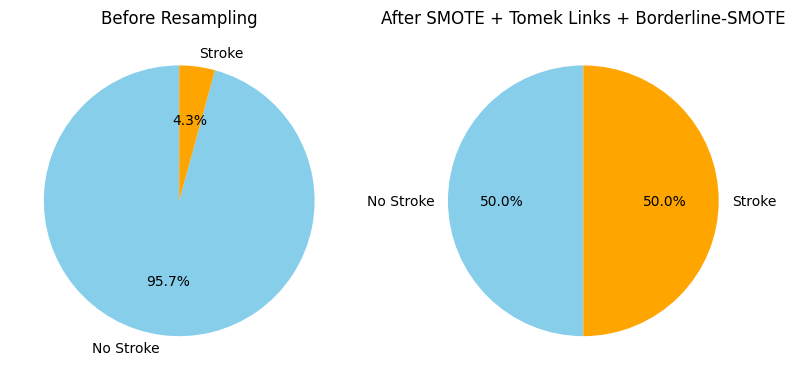

In [78]:
# Visualize class distribution before and after resampling
plt.figure(figsize=(8, 5))

# Before resampling
plt.subplot(1, 2, 1)
y.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Stroke', 'Stroke'], colors=['skyblue', 'orange'],ylabel='')
plt.title("Before Resampling")

# After Borderline-SMOTE SMOTE + Tomek Links
plt.subplot(1, 2, 2)
y_resampled.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No Stroke', 'Stroke'], colors=['skyblue', 'orange'],ylabel='')
plt.title("After SMOTE + Tomek Links + Borderline-SMOTE")

# Show plots
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd

# Combine features and target into a single DataFrame
train_data = pd.concat([X_resampled.reset_index(drop=True), y_resampled.reset_index(drop=True)], axis=1)

# Save the training data to a CSV file
train_data.to_csv('train_data_for_lime.csv', index=False)

print("Training data saved to 'train_data_for_lime.csv'")

Training data saved to 'train_data_for_lime.csv'


# **4. Model Building**

**4.1 Train-Test Split**

In [56]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Print the shapes of the resulting datasets
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing set shape (y_test):", y_test.shape)


Training set shape (X_train): (7777, 10)
Training set shape (y_train): (7777,)
Testing set shape (X_test): (1945, 10)
Testing set shape (y_test): (1945,)


**4.2 Train Gradient Boosting Models**


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Instantiate the GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, max_depth=3)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       976
           1       0.96      0.94      0.95       969

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [58]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Instantiate the XGBClassifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       976
           1       0.91      0.93      0.92       969

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



In [59]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Instantiate the LGBMClassifier
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 3892, number of negative: 3885
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500450 -> initscore=0.001800
[LightGBM] [Info] Start training from score 0.001800
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       976
           1       0.96      0.94      0.95       969

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [60]:
# Install catboost if not already installed
!pip install catboost

In [61]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Instantiate the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.6, depth=6, cat_features=[], verbose=50)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


0:	learn: 0.5243055	total: 18.6ms	remaining: 1.84s
50:	learn: 0.1801406	total: 458ms	remaining: 440ms
99:	learn: 0.1138112	total: 766ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       976
           1       0.94      0.95      0.94       969

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Assuming 'data' is your DataFrame and you've already defined X and y
X_features = data.drop(['stroke', 'id'], axis=1)
y_target = data['stroke']

# Split the data into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Initialize models
gbm_model1 = GradientBoostingClassifier(random_state=42)
xgb_model1 = xgb.XGBClassifier(random_state=42)
lgb_model1 = lgb.LGBMClassifier(random_state=42)
catboost_model1 = CatBoostClassifier(silent=True, random_state=42)

# Fit models on the training data
gbm_model1.fit(X_train_data, y_train_data)
xgb_model1.fit(X_train_data, y_train_data)
lgb_model1.fit(X_train_data, y_train_data)
catboost_model1.fit(X_train_data, y_train_data)

# Predict on the test set
y_pred_gbm = gbm_model1.predict(X_test_data)
y_pred_xgb = xgb_model1.predict(X_test_data)
y_pred_lgb = lgb_model1.predict(X_test_data)
y_pred_catboost = catboost_model1.predict(X_test_data)

# Calculate accuracy
acc_gbm = accuracy_score(y_test_data, y_pred_gbm)
acc_xgb = accuracy_score(y_test_data, y_pred_xgb)
acc_lgb = accuracy_score(y_test_data, y_pred_lgb)
acc_catboost = accuracy_score(y_test_data, y_pred_catboost)

# Print accuracies
print(f"Accuracy of GBM: {acc_gbm:.4f}")
print(f"Accuracy of XGBoost: {acc_xgb:.4f}")
print(f"Accuracy of LightGBM: {acc_lgb:.4f}")
print(f"Accuracy of CatBoost: {acc_catboost:.4f}")


[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880
Accuracy of GBM: 0.9384
Accuracy of XGBoost: 0.9393
Accuracy of LightGBM: 0.9384
Accuracy of CatBoost: 0.9403


#**5. Model Evaluation**

**5.1 Performance Metrics**

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an empty dictionary to store performance metrics
model_performance = {}

# List of trained models for evaluation
models = {
    "GBM": gbm_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": catboost_model
}

for model_name, model in models.items():
    # Get predictions for the test set
    if hasattr(model, "predict_proba") and len(set(y_test)) == 2:  # Binary classification
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
        y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary labels
    else:  # For models that output discrete labels directly
        y_pred = model.predict(X_test)

    # Ensure y_pred is of the same type as y_test
    y_pred = y_pred.astype(type(y_test[0]))

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision_per_class = precision_score(y_test, y_pred, average=None, labels=list(set(y_test)))
    recall_per_class = recall_score(y_test, y_pred, average=None, labels=list(set(y_test)))
    f1_per_class = f1_score(y_test, y_pred, average=None, labels=list(set(y_test)))

    # Store metrics in the dictionary
    metrics = {
        'Accuracy': accuracy,
    }
    for idx, label in enumerate(sorted(set(y_test))):  # Dynamically handle classes
        metrics[f'Precision (Class {label})'] = precision_per_class[idx]
        metrics[f'Recall (Class {label})'] = recall_per_class[idx]
        metrics[f'F1-score (Class {label})'] = f1_per_class[idx]

    model_performance[model_name] = metrics

# Print model performance metrics
for model_name, metrics in model_performance.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



GBM Performance:
Accuracy: 0.9532
Precision (Class 0): 0.9429
Recall (Class 0): 0.9652
F1-score (Class 0): 0.9539
Precision (Class 1): 0.9641
Recall (Class 1): 0.9412
F1-score (Class 1): 0.9525

XGBoost Performance:
Accuracy: 0.9203
Precision (Class 0): 0.9298
Recall (Class 0): 0.9098
F1-score (Class 0): 0.9197
Precision (Class 1): 0.9111
Recall (Class 1): 0.9309
F1-score (Class 1): 0.9209

LightGBM Performance:
Accuracy: 0.9470
Precision (Class 0): 0.9378
Recall (Class 0): 0.9580
F1-score (Class 0): 0.9478
Precision (Class 1): 0.9568
Recall (Class 1): 0.9360
F1-score (Class 1): 0.9463

CatBoost Performance:
Accuracy: 0.9434
Precision (Class 0): 0.9492
Recall (Class 0): 0.9375
F1-score (Class 0): 0.9433
Precision (Class 1): 0.9378
Recall (Class 1): 0.9494
F1-score (Class 1): 0.9436


In [64]:
from tabulate import tabulate

# Prepare data for tabulate
table_data = []
headers = ["Model", "Precision (0)", "Recall (0)", "F1-Score (0)", "Precision (1)", "Recall (1)", "F1-Score (1)"]

for model_name, metrics in model_performance.items():
    row = [model_name,
           metrics['Precision (Class 0)'], metrics['Recall (Class 0)'], metrics['F1-score (Class 0)'],
           metrics['Precision (Class 1)'], metrics['Recall (Class 1)'], metrics['F1-score (Class 1)']]
    table_data.append(row)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+----------+-----------------+--------------+----------------+-----------------+--------------+----------------+
| Model    |   Precision (0) |   Recall (0) |   F1-Score (0) |   Precision (1) |   Recall (1) |   F1-Score (1) |
+==========+=================+==============+================+=================+==============+================+
| GBM      |        0.942943 |     0.965164 |       0.953924 |        0.964059 |     0.941176 |       0.95248  |
+----------+-----------------+--------------+----------------+-----------------+--------------+----------------+
| XGBoost  |        0.929843 |     0.909836 |       0.919731 |        0.911111 |     0.930857 |       0.920878 |
+----------+-----------------+--------------+----------------+-----------------+--------------+----------------+
| LightGBM |        0.937813 |     0.957992 |       0.947795 |        0.956751 |     0.936017 |       0.94627  |
+----------+-----------------+--------------+----------------+-----------------+--------------+-

In [65]:
from tabulate import tabulate

# Model names
models = ['GBM', 'XGBoost', 'LightGBM', 'CatBoost']

# Accuracy scores for each model (scaled to 100)
accuracy = [95.32, 92.03, 94.70, 94.34]
accuracy_no_leakage = [93.84, 93.93, 93.84, 94.03]

# Prepare data for tabulate
table_data = []
headers = ["Model", "Accuracy (%)", "Accuracy (No Leakage) (%)"]

for i, model_name in enumerate(models):
    row = [model_name, f"{accuracy[i]:.2f}", f"{accuracy_no_leakage[i]:.2f}"]
    table_data.append(row)

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+----------+----------------+-----------------------------+
| Model    |   Accuracy (%) |   Accuracy (No Leakage) (%) |
+==========+================+=============================+
| GBM      |          95.32 |                       93.84 |
+----------+----------------+-----------------------------+
| XGBoost  |          92.03 |                       93.93 |
+----------+----------------+-----------------------------+
| LightGBM |          94.7  |                       93.84 |
+----------+----------------+-----------------------------+
| CatBoost |          94.34 |                       94.03 |
+----------+----------------+-----------------------------+


**Accuracy VS Accuracy (No Leakage)**

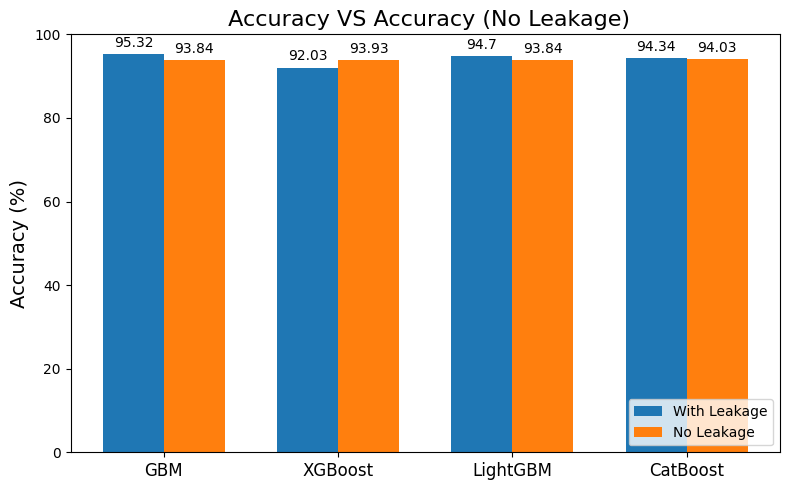

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['GBM', 'XGBoost', 'LightGBM', 'CatBoost']

# Accuracy scores for each model (scaled to 100)
accuracy = [95.32, 92.03, 94.70, 94.34]
accuracy_no_leakage = [93.84, 93.93, 93.84, 94.03]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5)) # Set figure size to 8x5
rects1 = ax.bar(x - width/2, accuracy, width, label='With Leakage')
rects2 = ax.bar(x + width/2, accuracy_no_leakage, width, label='No Leakage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title(' Accuracy VS Accuracy (No Leakage)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(loc='lower right', bbox_to_anchor=(1, 0))
ax.set_ylim(0, 100)  # Set y limit from 0 to 100
ax.set_yticks(np.arange(0, 101, 20))  # Set y ticks at intervals of 20

# Attach a text label above each bar in *rects*, displaying its height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**5.2 Compare Model Results**

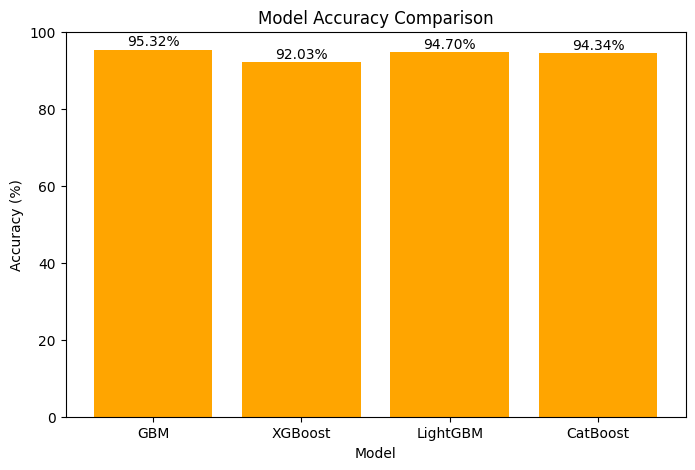

In [79]:
import matplotlib.pyplot as plt

# Extract model names and their accuracies
model_names = list(model_performance.keys())
accuracies = [metrics['Accuracy'] * 100 for metrics in model_performance.values()]  # Convert to percentage

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Adjust for percentage range

# Annotate each bar with its accuracy value
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=10)

plt.show()

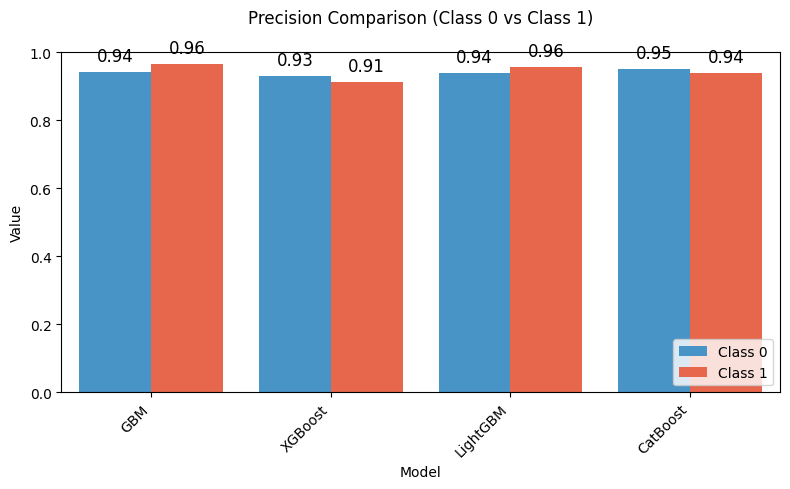

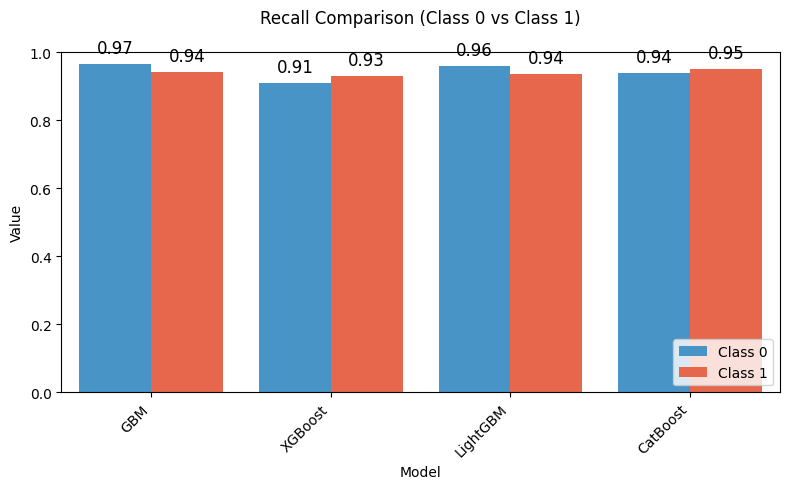

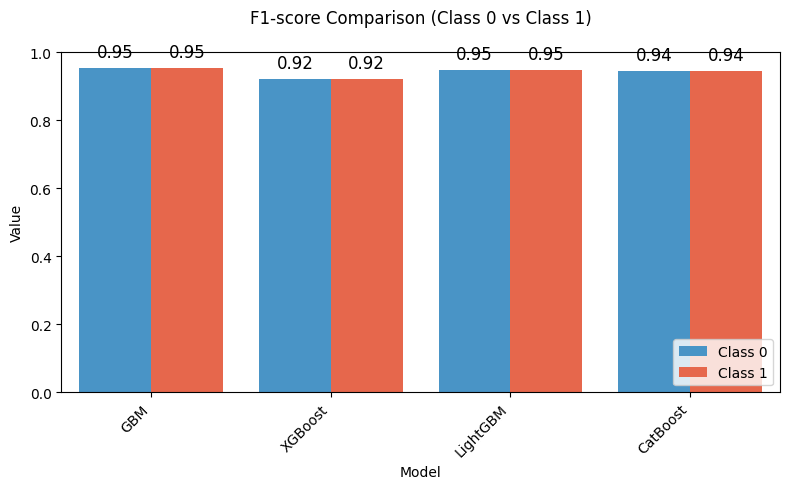

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to generate a bar plot for class-specific metrics with value annotations
def plot_class_comparison(model_performance, metric, colors):
    # Prepare the data for the specified metric (for both classes)
    model_names = list(model_performance.keys())
    performance_data = pd.DataFrame({
        'Model': model_names * 2,  # Repeat model names for Class 0 and Class 1
        'Class': ['Class 0'] * len(model_names) + ['Class 1'] * len(model_names),
        'Metric': [metric] * len(model_names) * 2,
        'Value': [
            model_performance[model][f'{metric} (Class 0)'] for model in model_names
        ] + [
            model_performance[model][f'{metric} (Class 1)'] for model in model_names
        ]
    })

    # Debug: Print the DataFrame to verify correctness
    #print(performance_data)

    # Plot the metric
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='Model', y='Value', hue='Class', data=performance_data, palette=colors)
    plt.title(f'{metric} Comparison (Class 0 vs Class 1)\n')
    plt.ylim(0, 1)
    plt.xticks(rotation=45, ha='right')

    # Add value annotations on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate non-zero values
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    # Adjust legend to the bottom right
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    plt.tight_layout()
    plt.show()

# List of metrics to plot and corresponding colors
metrics = ['Precision', 'Recall', 'F1-score']
colors = ['#3498DB', '#FF5733']  # Blue for Class 0, Red for Class 1

# Generate a plot for each metric with its corresponding colors
for metric in metrics:
    plot_class_comparison(model_performance, metric, colors)

# **6. XAI Implementation**

**6.1 Using SHAP (SHapley Additive exPlanations)**

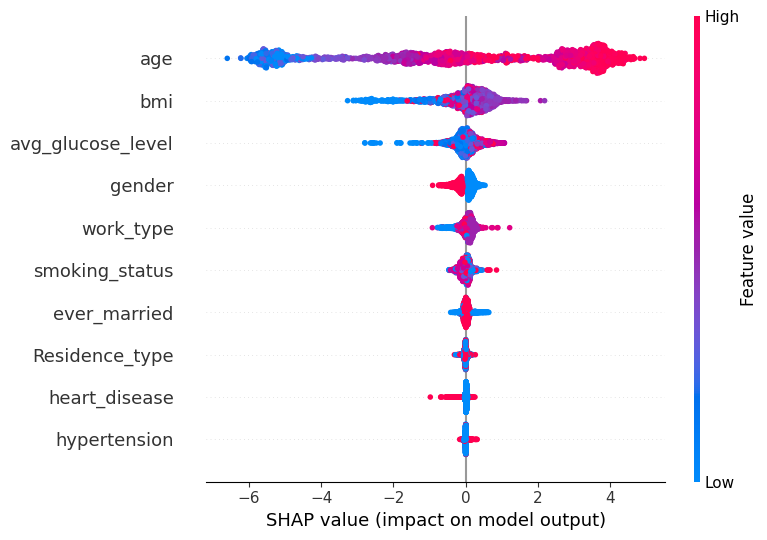

In [82]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP TreeExplainer for the best model (lgb_model)
explainer = shap.TreeExplainer(lgb_model)  # Use TreeExplainer for tree-based models
shap_values = explainer.shap_values(X_test)  # Calculate SHAP values for the test set

# Set the figure size to 8x5 inches
plt.figure(figsize=(10,10))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)  # Dot plot of feature importance
plt.show()

In [70]:
!pip install lime

**6.2 Using LIME**

<Figure size 800x500 with 0 Axes>

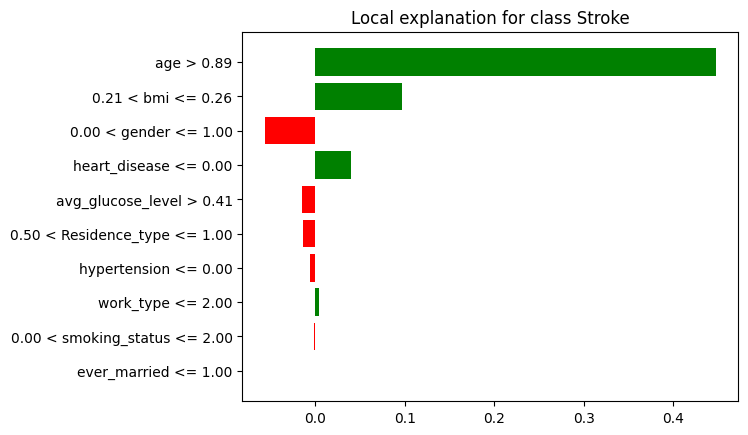

In [83]:
import lime
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv('/content/train_data_for_lime.csv')

# Separate features (X) and target variable (y)
X = train_data.drop('stroke', axis=1)
y = train_data['stroke']

# Create a LimeTabularExplainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    X.values,
    feature_names=X.columns.tolist(),
    class_names=['No Stroke', 'Stroke'],
    discretize_continuous=True
)

# Choose an instance to explain
instance_index = 5
exp = explainer.explain_instance(X.iloc[instance_index], lgb_model.predict_proba, num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True)

# Generate a plot with feature importances from LIME
plt.figure(figsize=(8, 5))
exp.as_pyplot_figure()
plt.show()

# **7. Conclusion**


The LightGBM model achieved the best performance with an impressive overall accuracy of 94.7%. The model demonstrated high precision, recall, and F1-scores for both classes: Class 0 (Precision: 0.9378, Recall: 0.9580, F1-score: 0.9478) and Class 1 (Precision: 0.9568, Recall: 0.9360, F1-score: 0.9463). Feature importance analysis using SHAP highlights that age, BMI, average glucose level, gender, and work type are the most influential features in predicting the target. These results indicate that the model is both accurate and interpretable, making it a reliable choice for the given task.

In [72]:
import joblib

model_names = ['gbm_model', 'xgb_model', 'lgb_model', 'catboost_model']
models = [gbm_model, xgb_model, lgb_model, catboost_model]

for model_name, model in zip(model_names, models):
    filename = f'{model_name}.joblib'
    joblib.dump(model, filename)
    print(f'{model_name} saved to {filename}')

gbm_model saved to gbm_model.joblib
xgb_model saved to xgb_model.joblib
lgb_model saved to lgb_model.joblib
catboost_model saved to catboost_model.joblib


In [73]:
import pkg_resources
import subprocess

def get_version(package_name):
    try:
        return pkg_resources.get_distribution(package_name).version
    except pkg_resources.DistributionNotFound:
        try:
            # Try using pip show if pkg_resources fails
            output = subprocess.check_output(['pip', 'show', package_name]).decode()
            for line in output.splitlines():
                if line.startswith('Version:'):
                    return line.split(':')[1].strip()
            return "Not Found"  # Version not found in pip show output
        except subprocess.CalledProcessError:
            return "Not Found" # pip show also failed

# Get versions
sklearn_version = get_version("scikit-learn")
catboost_version = get_version("catboost")
lightgbm_version = get_version("lightgbm")
xgboost_version = get_version("xgboost")
imblearn_version = get_version("imbalanced-learn")


with open('requirements.txt', 'w') as f:
  f.write(f'pandas=={get_version("pandas")}\n')
  f.write(f'scikit-learn=={sklearn_version}\n')
  f.write(f'imbalanced-learn=={imblearn_version}\n')
  f.write(f'matplotlib=={get_version("matplotlib")}\n')
  f.write(f'seaborn=={get_version("seaborn")}\n')
  f.write(f'xgboost=={xgboost_version}\n')
  f.write(f'lightgbm=={lightgbm_version}\n')
  f.write(f'catboost=={catboost_version}\n')
  f.write(f'shap=={get_version("shap")}\n')
  f.write(f'joblib=={get_version("joblib")}\n')
  f.write(f'lime=={get_version("lime")}\n')
  f.write(f'numpy=={get_version("numpy")}\n')
  f.write('google-colab\n')
  f.write('google-auth\n')
  f.write('pickle')

# Print the content of requirements.txt
!cat requirements.txt

pandas==2.2.2
scikit-learn==1.6.1
imbalanced-learn==0.13.0
matplotlib==3.10.0
seaborn==0.13.2
xgboost==2.1.3
lightgbm==4.5.0
catboost==1.2.7
shap==0.46.0
joblib==1.4.2
lime==0.2.0.1
numpy==1.26.4
google-colab
google-auth
pickle

In [74]:
import pandas as pd
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the saved LGBM model
try:
    lgb_model = joblib.load('lgb_model.joblib')
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Function to load and preprocess the dataset
def load_and_preprocess_data():
    try:
        data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
    except FileNotFoundError:
        print("Error: /content/healthcare-dataset-stroke-data.csv not found. Please upload this file.")
        exit()

    # Drop rows with NaN values in the 'bmi' column
    data.dropna(subset=['bmi'], inplace=True)

    # Convert categorical features to numerical using predefined encoding
    data['gender'] = data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
    data['ever_married'] = data['ever_married'].map({'No': 0, 'Yes': 1})
    data['Residence_type'] = data['Residence_type'].map({'Rural': 0, 'Urban': 1})

    # Convert 'work_type' and 'smoking_status' to numerical using Label Encoding
    label_encoder = LabelEncoder()
    data['work_type'] = label_encoder.fit_transform(data['work_type'])
    data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

    return data

# Function to decode categorical values back to their original form for better readability
def decode_input(input_data):
    gender_map = {0: 'Female', 1: 'Male', 2: 'Other'}
    ever_married_map = {0: 'No', 1: 'Yes'}
    work_type_map = {0: 'Govt_job', 1: 'Never_worked', 2: 'Private', 3: 'Self-employed', 4: 'Children'}
    residence_type_map = {0: 'Rural', 1: 'Urban'}
    smoking_status_map = {0: 'Unknown', 1: 'Formerly Smoked', 2: 'Never Smoked', 3: 'Smokes'}
    decoded_data = {
        'Gender': gender_map[input_data['gender'][0]],
        'Age': input_data['age'][0],
        'Hypertension': 'Yes' if input_data['hypertension'][0] == 1 else 'No',
        'Heart Disease': 'Yes' if input_data['heart_disease'][0] == 1 else 'No',
        'Ever Married': ever_married_map[input_data['ever_married'][0]],
        'Work Type': work_type_map[input_data['work_type'][0]],
        'Residence Type': residence_type_map[input_data['Residence_type'][0]],
        'Avg Glucose Level': input_data['avg_glucose_level'][0],
        'BMI': input_data['bmi'][0],
        'Smoking Status': smoking_status_map[input_data['smoking_status'][0]]
    }
    return decoded_data

# Load and preprocess the dataset
data = load_and_preprocess_data()

# Get input data from user
input_data = {
    'gender': [0],  # Female
    'age': [80],
    'hypertension': [0],  # No
    'heart_disease': [0],  # No
    'ever_married': [1],  # Yes
    'work_type': [3],  # Self-employed
    'Residence_type': [0],  # Rural
    'avg_glucose_level': [104.12],
    'bmi': [23.5],
    'smoking_status': [1]  # Formerly Smoked
}

# Print user-selected values in a readable format
decoded_input = decode_input(input_data)
print("\nUser Selections:")
for key, value in decoded_input.items():
    print(f"{key}: {value}")

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Get the numerical columns from the original data
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Exclude 'stroke' and 'id' from the numerical columns if they exist
numerical_cols = [col for col in numerical_cols if col not in ['stroke', 'id']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical columns of the original data
scaler.fit(data[numerical_cols])

# Transform the input data using the fitted scaler
input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

# Make a prediction using the loaded model
try:
    prediction_proba = lgb_model.predict_proba(input_df)
    predicted_class = lgb_model.predict(input_df)
    print("\nPrediction Results:")
    print(f"Prediction Probabilities: {prediction_proba}")
    print(f"Predicted Class: {'Stroke' if predicted_class[0] == 1 else 'No Stroke'}")
except Exception as e:
    print(f"Error making prediction: {e}")


User Selections:
Gender: Female
Age: 80
Hypertension: No
Heart Disease: No
Ever Married: Yes
Work Type: Self-employed
Residence Type: Rural
Avg Glucose Level: 104.12
BMI: 23.5
Smoking Status: Formerly Smoked

Prediction Results:
Prediction Probabilities: [[0.41572007 0.58427993]]
Predicted Class: Stroke
